In [ ]:
import pandas as pd
from google.colab import drive
df = pd.read_csv("flats.csv", delimiter=",", encoding="Windows-1251")
df = df.fillna("")
df.iloc[:, 0:1] = df.iloc[:, 0:1].replace("", "N/A")
df.iloc[:, 2:4] = df.iloc[:, 2:4].replace("", 0)
df.iloc[:, 4] = df.iloc[:, 4].astype(int)
df = df.drop_duplicates()
df = df[(df["Address"] != "N/A") & (df["Floor"] != 0) & (df["Square, м2"] != 0) & (df["Price, руб."] != 0)]
print(df.dtypes)
df

In [4]:
flats_df = df

# Площадь
total_sq, living_sq, kitchen_sq = [], [], []
for i in flats_df['Square, м2']:
  i = i.replace(',', '.')
  temp = i.split('/')
  total_sq.append(round(float(temp[0]), 2))
  living_sq.append(round(float(temp[1]), 2))
  kitchen_sq.append(round(float(temp[2]), 2))

# Этаж
curr_floors, total_floors = [], []
for i in flats_df['Floor']:
  if type(i) != 'int':
    temp = i.split('/')
    if temp[0] == '':
      curr_floors.append(0)
    if temp[1] == '':
      total_floors.append(0)
    else:
      curr_floors.append(int(temp[0]))
      total_floors.append(int(temp[1]))

flats_df = pd.DataFrame({"Current floor": curr_floors,
                         "Total floors":total_floors,
                         "Total area":total_sq,
                         "Living area":living_sq,
                         "Kitchen area":kitchen_sq,
                         "Price":flats_df["Price, руб."]})

flats_df

,Current floor,Total floors,Total area,Living area,Kitchen area,Price
0,4,5,55.6,32.0,9.0,3600000
1,3,3,45.6,35.0,8.0,4999999
2,4,4,52.8,35.0,11.0,4500000
3,16,16,56.4,0.0,0.0,4500000
4,8,9,49.0,32.0,8.0,3600000
...,...,...,...,...,...,...
328,2,3,55.7,29.5,12.7,3287000
329,2,3,78.0,62.7,15.0,4446000
330,2,3,50.0,36.0,12.0,2590000
331,1,5,47.3,0.0,10.0,3000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns



<Axes: >

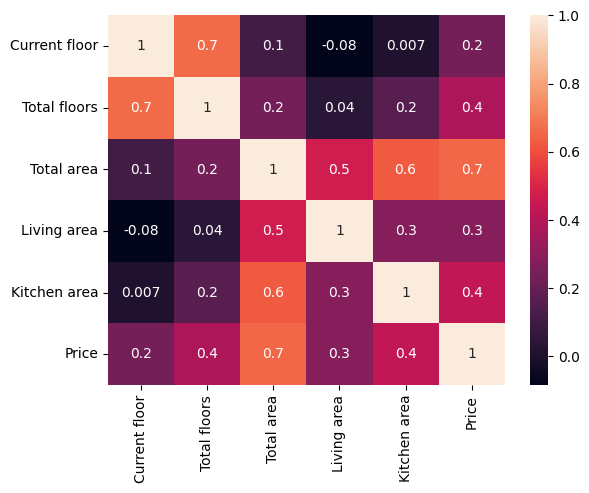

In [6]:
flats_df['Price'].describe()
sns.heatmap(flats_df.corr(), annot = True, fmt='.1g')

Без нормализации

In [22]:
x = flats_df[['Current floor', 'Total floors','Total area','Living area','Kitchen area']]
y = flats_df['Price']

x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x, y, test_size=0.3)
regressor = LinearRegression()
regressor.fit(x_train_lr, y_train_lr)
coef = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coef

,Coefficient
Current floor,9022.130046
Total floors,62019.393953
Total area,71705.474244
Living area,-4375.707871
Kitchen area,17070.705901


In [23]:
y_pred_lr = regressor.predict(x_train_lr)

pred_df1 = pd.DataFrame({'Actual': y_train_lr, 'Predicted': y_pred_lr})
pred_df1

,Actual,Predicted
140,3100000,3.113236e+06
193,3999999,4.425734e+06
155,2250000,2.994437e+06
88,2800000,3.918364e+06
204,3350000,3.219437e+06
...,...,...
48,2490000,3.851471e+06
311,3750000,3.856541e+06
108,3990000,4.099565e+06
200,3070000,3.153499e+06


Коэфициент детерминации: 0.46571714031346023
MAE (Mean Absolute Error): 451930.1905832393
MSE (Mean Squared Error): 489799923130.4182
Root MSE: 699857.0733588524


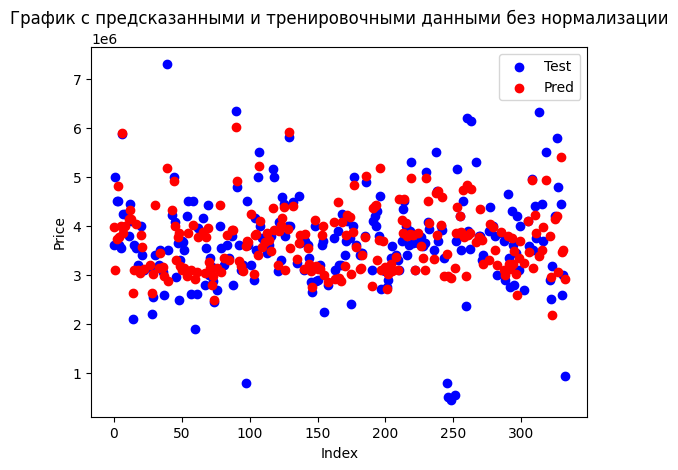

In [24]:
print('Коэфициент детерминации:', regressor.score(x_train_lr, y_train_lr))
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_train_lr, y_pred_lr))
print('MSE (Mean Squared Error):', metrics.mean_squared_error(y_train_lr, y_pred_lr))
print('Root MSE:', np.sqrt(metrics.mean_squared_error(y_train_lr, y_pred_lr)))
plt.title('График с предсказанными и тренировочными данными без нормализации')
plt.xlabel('Index')
plt.ylabel('Price')
plt.scatter(pred_df1.index, y_train_lr, color='b', label='Test')
plt.scatter(pred_df1.index, y_pred_lr, color='r', label='Pred')
plt.legend()

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

norm = scaler.fit_transform(x)
norm

array([[ 0.05150096, -0.41494793,  0.59279115,  0.16919258,  0.24245951],
       [-0.34733204, -1.04018623, -0.60961765,  0.48018318, -0.09965497],
       [ 0.05150096, -0.72756708,  0.25611668,  0.48018318,  0.92668848],
       ...,
       [-0.74616504, -1.04018623, -0.08055778,  0.58384671,  1.26880296],
       [-1.14499804, -0.41494793, -0.40520815, -3.14804043,  0.584574  ],
       [-1.14499804, -0.41494793, -1.1627257 , -0.84671003, -0.37334656]])

In [26]:
x_train_lr_n, x_test_lr_n, y_train_lr_n, y_test_lr_n = train_test_split(norm, y, test_size=0.2)
regressor = LinearRegression()
regressor.fit(x_train_lr_n, y_train_lr_n)
coef = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coef

,Coefficient
Current floor,59169.373780
Total floors,186935.924811
Total area,599282.334449
Living area,13191.783222
Kitchen area,36011.144239


In [27]:
y_pred_lr_n = regressor.predict(x_train_lr_n)

pred_df2 = pd.DataFrame({'Actual': y_train_lr_n, 'Predicted': y_pred_lr_n})
pred_df2

,Actual,Predicted
105,3500000,3.885247e+06
133,5100000,4.033969e+06
7,4250000,3.877527e+06
237,5500000,4.728951e+06
149,2880000,3.048629e+06
...,...,...
221,5050000,4.210374e+06
64,4500000,4.303221e+06
327,4800000,3.075746e+06
13,4095000,4.196297e+06


Коэфициент детерминации: 0.5015773740244878
MAE (Mean Absolute Error): 485512.0955437684
MSE (Mean Squared Error): 539223074891.0484
Root MSE: 734318.1019769623


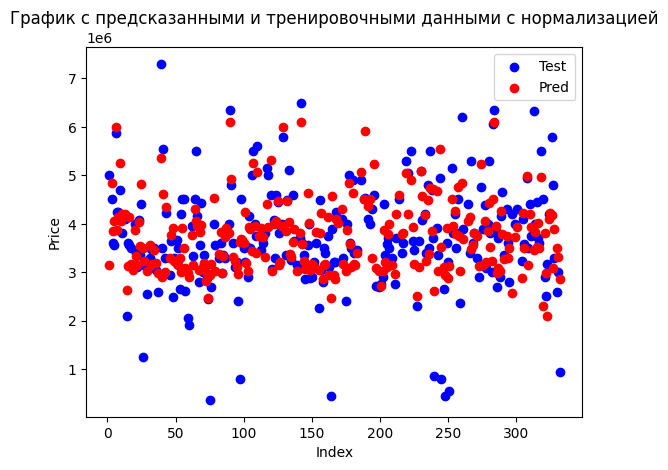

In [28]:
print('Коэфициент детерминации:', regressor.score(x_train_lr_n, y_train_lr_n))
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_train_lr_n, y_pred_lr_n))
print('MSE (Mean Squared Error):', metrics.mean_squared_error(y_train_lr_n, y_pred_lr_n))
print('Root MSE:', np.sqrt(metrics.mean_squared_error(y_train_lr_n, y_pred_lr_n)))
plt.title('График с предсказанными и тренировочными данными с нормализацией')
plt.xlabel('Index')
plt.ylabel('Price')
plt.scatter(pred_df2.index, y_train_lr_n, color='b', label='Test')
plt.scatter(pred_df2.index, y_pred_lr_n, color='r', label='Pred')
plt.legend()

Гребневая регрессия

In [14]:
from sklearn. linear_model import Ridge
from sklearn. linear_model import RidgeCV
from sklearn. model_selection import RepeatedKFold
from numpy import arange

In [15]:
x = flats_df[['Current floor', 'Total floors','Total area','Living area','Kitchen area']]
y = flats_df['Price']
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x, y, test_size = 0.3)

In [16]:
cv = RepeatedKFold(n_splits= 4 , n_repeats= 3 , random_state= 1 )

model = RidgeCV(alphas=arange(0.01, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
model.fit(x_train_r, y_train_r)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=4, random_state=1),
        scoring='neg_mean_absolute_error')

In [17]:
y_pred_r = model.predict(x_train_r)
pred_df_r = pd.DataFrame({'Actual': y_train_r, 'Predicted': y_pred_r})
pred_df_r

,Actual,Predicted
130,4000000,3.675794e+06
49,3300000,3.177186e+06
175,2399000,2.972034e+06
251,550000,3.025306e+06
104,4160000,3.917651e+06
...,...,...
154,3700000,3.892336e+06
261,3890000,3.708310e+06
95,3200000,3.085520e+06
164,450000,2.399266e+06


Коэфициент детерминации: 0.4771713882760481
MAE (Mean Absolute Error): 474355.4106413589
MSE (Mean Squared Error): 537773552664.04395
Root MSE: 733330.4525683111


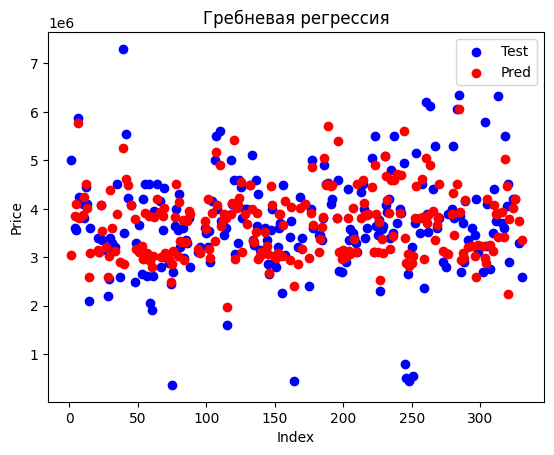

In [18]:
print('Коэфициент детерминации:', model.score(x_train_r, y_train_r))
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_train_r, y_pred_r))
print('MSE (Mean Squared Error):', metrics.mean_squared_error(y_train_r, y_pred_r))
print('Root MSE:', np.sqrt(metrics.mean_squared_error(y_train_r, y_pred_r)))
plt.title('Гребневая регрессия')
plt.xlabel('Index')
plt.ylabel('Price')
plt.scatter(pred_df_r.index, y_train_r, color='b', label='Test')
plt.scatter(pred_df_r.index, y_pred_r, color='r', label='Pred')
plt.legend()

Лассо

In [29]:
from sklearn.linear_model import Lasso

model = Lasso()

x = flats_df[['Current floor', 'Total floors','Total area','Living area','Kitchen area']]
y = flats_df['Price']
x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(x, y, test_size=0.3)

model.fit(x_train_l, y_train_l)
y_pred_l = model.predict(x_train_l)

pred_df_l = pd.DataFrame({'Actual': y_train_l, 'Predicted': y_pred_l})
pred_df_l

,Actual,Predicted
43,4225000,4.304378e+06
69,4430000,3.906979e+06
21,3400000,3.355072e+06
78,4000000,4.512138e+06
13,4095000,4.137611e+06
...,...,...
89,4000000,3.738311e+06
71,3350000,3.075150e+06
11,3800000,4.137533e+06
137,3650000,3.813689e+06


Коэфициент детерминации: 0.529374789140852
MAE (Mean Absolute Error): 497852.7026600532
MSE (Mean Squared Error): 550564265122.521
Root MSE: 742000.1786539684


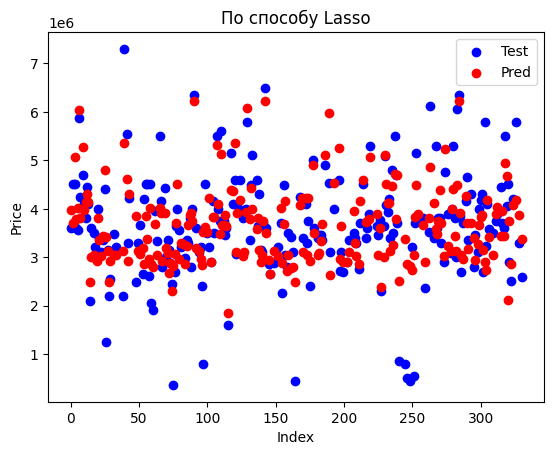

In [30]:
print('Коэфициент детерминации:', model.score(x_train_l, y_train_l))
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_train_l, y_pred_l))
print('MSE (Mean Squared Error):', metrics.mean_squared_error(y_train_l, y_pred_l))
print('Root MSE:', np.sqrt(metrics.mean_squared_error(y_train_l, y_pred_l)))
plt.title('По способу Lasso')
plt.xlabel('Index')
plt.ylabel('Price')
plt.scatter(pred_df_l.index, y_train_l, color='b', label='Test')
plt.scatter(pred_df_l.index, y_pred_l, color='r', label='Pred')
plt.legend()

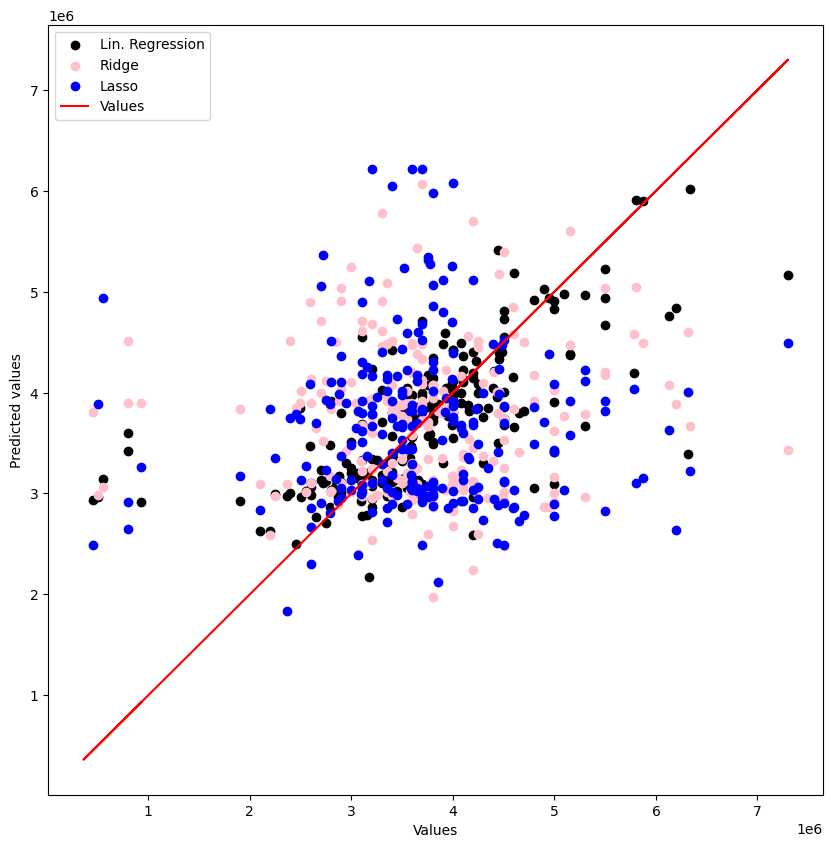

In [37]:
plt.figure(figsize=(10, 10))
plt.scatter(y_train_lr, y_pred_lr, color='black', label='Lin. Regression')
plt.scatter(y_train_lr, y_pred_r, color='pink', label='Ridge')
plt.scatter(y_train_lr, y_pred_l, color='blue', label='Lasso')
plt.plot(flats_df['Price'], flats_df['Price'], color='red', label='Values')

plt.xlabel("Values")
plt.ylabel("Predicted values")

plt.legend()